# Logistic Regression on Pima Indians Diabetes Dataset

[Dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Data/PimaIndians.csv)

[EDA on dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Python Notebooks/PimaIndians Diabetes.ipynb)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)


from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix,PrecisionRecallCurve

from imblearn.over_sampling import SMOTE

In [2]:
pima = pd.read_csv('../../Lab1/Heenal/Data/PimaIndians.csv')

In [3]:
pima.shape

(392, 9)

In [4]:
# converting the target into numerical values
lb = LabelBinarizer()
pima['test'] = lb.fit_transform(pima['test'].values)


In [5]:
type(pima)

pandas.core.frame.DataFrame

In [6]:
# Selecting glucose and triceps as features

X = pima.drop(['test', 'pregnant', 'diastolic', 'insulin', 'diabetes','bmi', 'triceps'],axis = 1).values

In [7]:
X.shape

(392, 2)

In [8]:
y = pima['test'].values

In [9]:
y.shape

(392,)

In [10]:
# Splitting the dataset into TRAIN and TEST sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
X_train.shape

(274, 2)

## Visualizing the range of values of the features selected

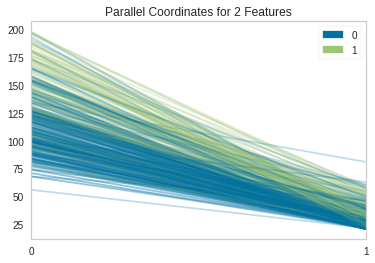

In [12]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.poof()

### The range of values is too varied and hence, the features should be scaled or normalized.

In [13]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


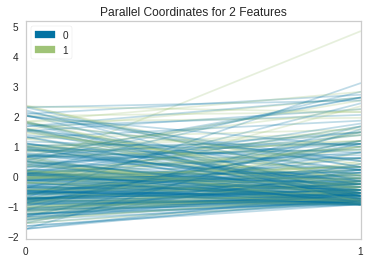

In [14]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X_train_std, y)
visualizer.poof()

In [15]:
# Using the Logistic Regression as the model

lr = LogisticRegression(C=0.0001, random_state=0)
lr.fit(X_train_std, y_train)

/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [16]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')


In [17]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

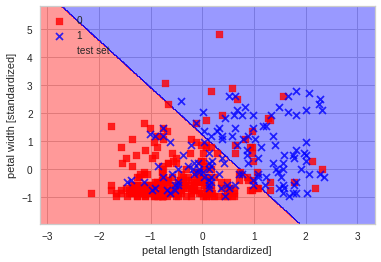

In [18]:
plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(275,392))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


# Plotting the learning curve using sklearn

In [19]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

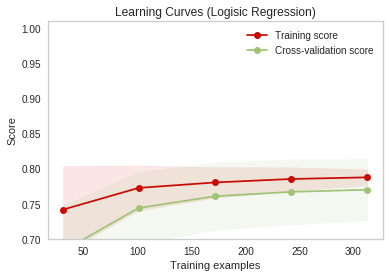

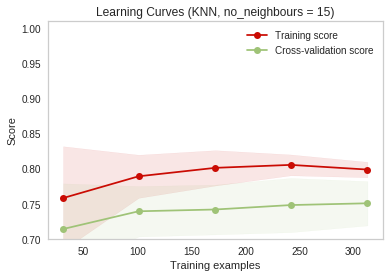

In [22]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

# Checking out all the metrics

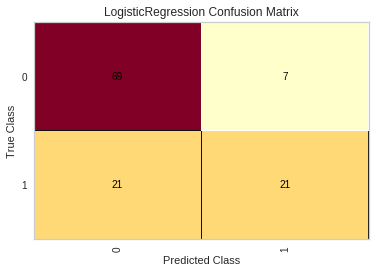

In [23]:
# Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(lr, classes=[0,1])
cm.score(X_test_std, y_test)
cm.poof()

** The result seems to be more inclined towards class '0' i.e. those not showing signs of Daibetes. There are as many False Negatives as there are True Positives for class '1' i.e. those showing signs of Diabetes.  **

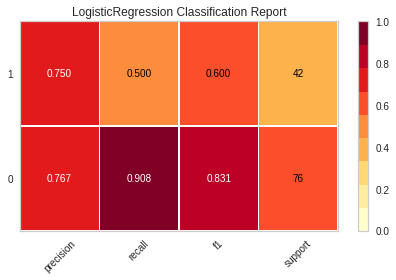

In [24]:
# Generating the classification report containing measures of precision, recall and F1-score

visualizer = ClassificationReport(lr, support=True)

visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()

** A high recall for class '0' indicates the model approximately correctly identifies if there are no signs of diabetes, but, a low recall on class '1' depicts the model is unable to detect diabetes. **

In [25]:
# Checking the Average Precision Score

y_score = lr.decision_function(X_test)
metrics.average_precision_score(y_test, y_score)

0.7364230049798519

In [26]:
y_score

array([1.08967189, 1.3897637 , 0.80697428, 0.94697959, 0.79335884,
       1.18314471, 0.82961073, 0.77722423, 1.23764254, 1.19029439,
       0.74263976, 1.00416442, 0.76129354, 0.88955474, 0.97400654,
       0.45827473, 0.9383664 , 0.74263976, 0.61250722, 0.84176267,
       0.77072239, 1.01550069, 0.87801456, 0.78267041, 0.67558216,
       1.07837171, 0.79356276, 0.63786676, 0.71979939, 0.74934552,
       0.78730092, 1.02554129, 0.67285907, 0.81221654, 1.14352189,
       1.28100803, 0.6835475 , 0.8495241 , 0.79880502, 0.90987594,
       1.04525074, 0.78665308, 1.11966194, 1.11023309, 0.70492437,
       0.63660718, 0.97734138, 1.1699371 , 1.00396051, 1.26568908,
       0.84891235, 1.15717342, 0.78917225, 0.63388409, 1.3053119 ,
       0.89813184, 0.91678562, 0.66615331, 1.37801959, 0.93901424,
       0.67285907, 0.93564332, 0.83696433, 1.31140591, 0.8583412 ,
       0.87781064, 0.81725488, 0.71037054, 0.77344548, 0.77470506,
       0.67663783, 1.17855028, 0.65798405, 0.7432876 , 0.72252

In [27]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [28]:
# Predicted labels on the TEST set

y_pred = lr.predict(X_test_std)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0])

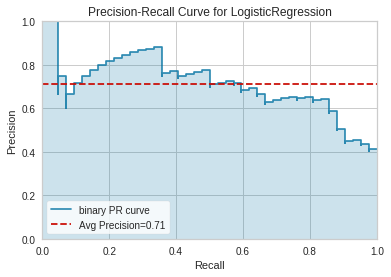

In [29]:
# Plotting the precision-recall curve

viz = classifier.PrecisionRecallCurve(LogisticRegression(C=0.0001, random_state=0))
viz.fit(X_train_std, y_train)
viz.score(X_test_std, y_test)
viz.poof()


In [30]:
# Sample-wise probability estimates for each class

lr.predict_proba(X_test_std)

array([[0.50022428, 0.49977572],
       [0.49733525, 0.50266475],
       [0.50291138, 0.49708862],
       [0.50051837, 0.49948163],
       [0.5026979 , 0.4973021 ],
       [0.49884201, 0.50115799],
       [0.50247524, 0.49752476],
       [0.50276135, 0.49723865],
       [0.49763972, 0.50236028],
       [0.49737197, 0.50262803],
       [0.50348478, 0.49651522],
       [0.50141501, 0.49858499],
       [0.50314441, 0.49685559],
       [0.50135835, 0.49864165],
       [0.50062571, 0.49937429],
       [0.50567094, 0.49432906],
       [0.50180726, 0.49819274],
       [0.50348478, 0.49651522],
       [0.5044504 , 0.4955496 ],
       [0.50250757, 0.49749243],
       [0.50313404, 0.49686596],
       [0.50016881, 0.49983119],
       [0.50228491, 0.49771509],
       [0.50284674, 0.49715326],
       [0.50401547, 0.49598453],
       [0.49941423, 0.50058577],
       [0.50301752, 0.49698248],
       [0.50405697, 0.49594303],
       [0.50360129, 0.49639871],
       [0.50343171, 0.49656829],
       [0.

In [31]:
# mean accuracy
lr.score(X_test_std, y_test)

0.7627118644067796

In [32]:
# Number of samples accurately classified
metrics.accuracy_score(y_test, y_pred, normalize=False)

90

In [33]:
metrics.roc_auc_score(y_test, y_score)

0.8098370927318296

In [34]:
# LOG loss
metrics.log_loss(y_test, y_pred)

8.195689290165344

# Trying to solve the imbalance in data
```
This approach is considered because of the imbalance in dataset. There are only 33% of diabetic patients in the dataset and hence, less enough for the model to learn and detect signs of diabetes.

There are many approaches to solve imbalance in dataset:
1. Undersampling the majority class
2. Oversampling the minority class
3. SMOTE : Synthetic Minority Oversampling technique

We implement the 3rd one as it involves generation of new data rather than just copying the available data as in 2nd method or losing information as in 1st method. 

```

In [45]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


('Number transactions X_train dataset: ', (274, 2))
('Number transactions y_train dataset: ', (274,))
('Number transactions X_test dataset: ', (118, 2))
('Number transactions y_test dataset: ', (118,))


In [46]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 88
Before OverSampling, counts of label '0': 186 

After OverSampling, the shape of train_X: (372, 2)
After OverSampling, the shape of train_y: (372,) 

After OverSampling, counts of label '1': 186
After OverSampling, counts of label '0': 186


In [47]:
# Scaling the data

sc = StandardScaler()
sc.fit(X_train_res)

X_train_std_res = sc.transform(X_train_res)
X_test_std = sc.transform(X_test)

/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
lr = LogisticRegression(C=0.0001, random_state=0)
lr.fit(X_train_std_res, y_train_res)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [49]:
lr.score(X_test_std, y_test)

0.7627118644067796

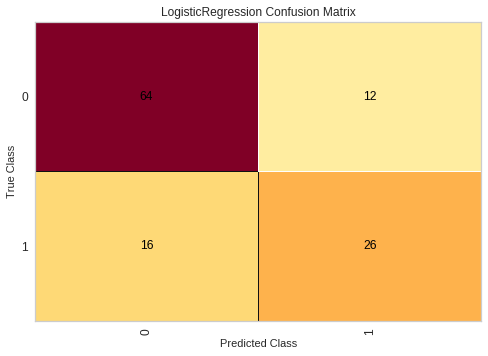

In [50]:
cm = ConfusionMatrix(lr, classes=[0,1])
cm.score(X_test_std, y_test)
cm.poof()

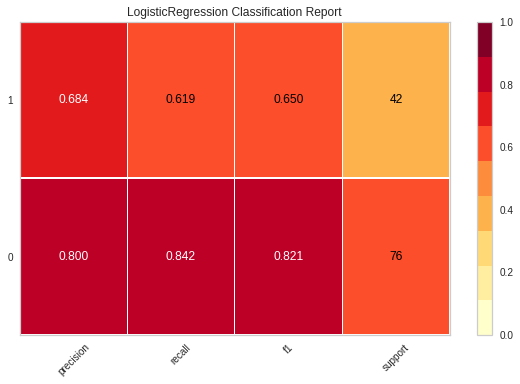

In [51]:
visualizer = ClassificationReport(lr, support=True)

visualizer.fit(X_train_std_res, y_train_res)
visualizer.score(X_test_std, y_test)
visualizer.poof()

** We observe that the recall for class '1' has improved a bit after generation of more data. **

# Plotting the validation curve

In [155]:
train_scores, valid_scores = validation_curve(LogisticRegression(), X, y, "C", np.logspace(-7, 3, 3), cv=5, n_jobs=4)

In [151]:
LogisticRegression().get_params().keys()

['warm_start',
 'C',
 'n_jobs',
 'verbose',
 'intercept_scaling',
 'fit_intercept',
 'max_iter',
 'penalty',
 'multi_class',
 'random_state',
 'dual',
 'tol',
 'solver',
 'class_weight']

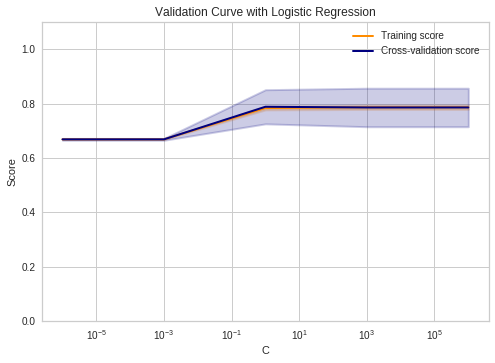

In [167]:
param_range = np.logspace(-6, 6, 5)
train_scores, test_scores = validation_curve( LogisticRegression(), X, y, param_name="C", param_range=param_range, cv=10, scoring="accuracy", n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
